<a id='HAM10000_dataset'></a>
### The [HAM10000 dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

From [[1]](#HAM10000ref):
>Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (```akiec```), basal cell carcinoma (```bcc```), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, ```bkl```), dermatofibroma (```df```), melanoma (```mel```), melanocytic nevi (```nv```) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, ```vasc```).

>More than 50% of lesions are confirmed through histopathology (```histo```), the ground truth for the rest of the cases is either follow-up examination (```follow_up```), expert consensus (```consensus```), or confirmation by in-vivo confocal microscopy (```confocal```). The dataset includes lesions with multiple images, which can be tracked by the ```lesion_id```-column within the **HAM10000_metadata** file.



### Data exploration

#### Summary

The HAM10000 dataset contains 10,015 dermatoscopic images of pigmented skin lesions, all of which are 600 x 450 RGB images in the .jpg format. 

For many lesions, there is more than one image: the 10,015 images represent 7,470 distinct lesions. It is possible that the dataset represents less than 7,470 people, i.e. it may contain images of two or more distinct lesions from one person: available information neither confirms nor precludes this.

There is exactly one image for 5,514 of the 7,470 lesions, and two to six distinct images of each of the remaining 1,956 lesions. Upon visual inspection of all images of a few of those 1,956 lesions, it appears that they are not merely the result of artificial augmentation of one original image, but are in fact distinct images taken at distinct times under various conditions (e.g. possibly using different instruments, or different instrument settings or different lighting/magnification/etc.). 

Therefore, we will speak of "distinct lesions" (of which there are 7,470) versus "images" (of which there are 10,015, with certain lesions are "imaged" multiple times).

We should partition our data based on distinct lesions, not images. Otherwise, a subset of distinct lesions will have images in both training and validation sets. We did not view all images and cannot rule out that some images are literally duplicates, but even if they are not, two images of the same lesion may be correlated. 

Also, if and when we perform data augmentation, perhaps we should first augment images from the subset of the 5,514 distinct lesions for which we have just one image in our dataset.

All 7,470 distinct lesions—indeed, all 10,015 images—have been diagnosed (labeled) as one of seven different types of skin lesion. 

The dataset is imbalanced. There is a preponderance of melanocytic nevi diagnoses ('nv') (5,403 distinct lesions, 6,705 images). Only 988 of these were imaged more than once. On the other hand, just 614 distinct lesions (1,113 images) are labeled as melanoma ('mel'): 384 of these were imaged more than once. That's an 18.2% chance of a lesion being images more than once given that it is a nevus, versus a 62.54% chance given it's a melanoma. We can imagine a physician being confident enough in the case of most typical nevi to diagnose after one look under a dermatoscope, but wanting to get a better look at suspected dangerous lesions, to be more confident so as to minimize unnecessarily concerning a patient or performing a biopsy.

As a result, nevi and melanoma respectively represent 72.33% and 8.22% of all distinct lesions, but 66.95% and 11.11% of all images. The breakdown for all classes is as follows:


```
DISTINCT LESIONS
dx         nv     bkl     mel     bcc   akiec   vasc     df
freq  5403.00  727.00  614.00  327.00  228.00  98.00  73.00
%       72.33    9.73    8.22    4.38    3.05   1.31   0.98
```

```
IMAGES
dx         nv      mel      bkl     bcc   akiec    vasc      df
freq  6705.00  1113.00  1099.00  514.00  327.00  142.00  115.00
%       66.95    11.11    10.97    5.13    3.27    1.42    1.15
```

For every lesion/image, one of four diagnosis types is given, enabling us to see how each lesion was diagnosed (histopathology, expert consensus, in-vivo confocal microscopy, or follow-up examination). _All_ melanoma ('mel'), basal cell carcinoma ('bcc'), and actinic keratoses and intraepithelial carcinoma ('akiec') were diagnosed via histopathology. In contrast, only around one quarter of melanocytic nevi were diagnosed via histopathology. It might be interesting to see what our models say about the nevi that were diagnosed via histopathology and/or were imaged many times, as they may represent unusual nevi for which a physician could not confidently determine the type of lesion based just on images. 

For all but 203 (2.85%) distinct lesions, we also have the age and sex of the patient from which the lesion was imaged, as well as the localization (body site) of the lesion. 

Bearing in mind that our dataset may contain multiple distinct lesions from a single patient: 4,001 (53.56%) distinct lesions come from a male patient, 3,419 (45.77%) female, 50 (0.67%) unspecified sex. The proportions are similar if we consider all images (53.98%/45.45%/0.57%).

Among all distinct lesions from a male patient, 9.27% are melanoma, versus 7.11% of lesions from female patients. Conversely, among all distinct melanoma lesions, the proportion from a male patient is 60.42%. Similarly, among all distinct basal cell carcinoma ('bcc') lesions, the proportion from a male patient is 62.69%. For all diagnoses except dermatofibroma ('df'), the larger proportion are in male patients, although the split is close to 50/50 for melanocytic nevi ('nv') and vascular lesions ('vasc').
  
With a view towards potentially using sex, age, or localization as a predictor of diagnosis, let us look at ```Prob(dx | sex)``` (i.e. the probability of a certain diagnosis given the sex of the patient), etc.

```
DISTINCT LESIONS. PROBABILITIES DISPLAYED AS PERCENTAGES.

Prob(dx | sex) 
sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0
```

```
Prob(dx | age) 
age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68
```

```
Prob(dx | localization) 
localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77  
```

<a id = 'references'></a>
### References

<a id = 'HAM10000ref'>[1]</a> Tschandl, Philipp, 2018, "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions", https://doi.org/10.7910/DVN/DBW86T, Harvard Dataverse, V4, UNF:6:KCZFcBLiFE5ObWcTc2ZBOA== [fileUNF]

<a id = 'Wen_et_al_ref'>[2]</a> Wen, David, et. al. "[Characteristics of publicly available skin cancer image datasets: a systematic review](https://doi.org/10.1016/S2589-7500(21)00252-1)." _The Lancet Digital Health_ 4(1), E64–E74, 2022.

In [2]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# Read the metadata csv file into a pandas dataframe, and take a
# look at its structure.

path_to_data = '.\\'

HAM10000_metadata = pd.read_csv(path_to_data + 'HAM10000_metadata.csv')
HAM10000_metadata.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [4]:
# Before continuing with the exploration of the metadata, let's
# look at the images themselves.

path_to_images = '.\\HAM10000_images\\'

# Get the image id of the first image.
test_img_id = HAM10000_metadata['image_id'].iloc[0]

# Use the PIL.Image.open method to open the image, which is a .jpg
# file.
test_img = Image.open(path_to_images + test_img_id + '.jpg')

print(f'The image has size {test_img.size} (height {test_img.size[1]} pixels, width {test_img.size[0]} pixels).')
print(f'\nThe image mode is {test_img.mode}.')
print(f'\nThe image format is {test_img.format}.')

The image has size (600, 450) (height 450 pixels, width 600 pixels).

The image mode is RGB.

The image format is JPEG.


In [7]:
# We verify that every image has the same size (height 450 pixels,
# width 600 pixels), and the same mode ('RGB').

non_conform_list = []

for img_id in HAM10000_metadata['image_id']:
    img = Image.open(path_to_images + img_id + '.jpg')
    if not(img.size == test_img.size and img.mode == test_img.mode and img.format == test_img.format):
        non_conform_list.append(img_id)

if non_conform_list == []:
    print(f'All images have height {test_img.size[1]} pixels, width {test_img.size[0]} pixels, mode {test_img.mode}, and format {test_img.format}.')
else:
    print(f'The images do not all have the same size, mode, and format.')

All images have height 450 pixels, width 600 pixels, mode RGB, and format JPEG.


In [5]:
# Let's convert some images to numpy arrays and investigate them.
# Start with the image of the first row of our dataframe.

img_ext = '.jpg'

img = np.asarray(Image.open(path_to_images + HAM10000_metadata['image_id'].iloc[0] + img_ext))

# All images have the same size, so the shape of the array will be
# (450,600) (height 450 pixels and width 600 pixels).

img_shape = img.shape 

# Randomly select 
m = 10
# images for each type of lesion, and put them in a dictionary.
lesions = HAM10000_metadata['dx'].unique()
k = len(lesions)
random_images = {}
for dx in lesions:
    random_images[dx] = HAM10000_metadata[HAM10000_metadata['dx'] == dx].sample(n=m)['image_id'].values

# We'll convert each of the km images into a numpy array of shape
# img_shape,  and   then combine them    into  an array  of shape
# (k, m,*img_shape). We initialize such an array.
random_images_array = np.random.randint(low=0, high=256, size=(k, m,*img_shape), dtype=np.uint8)

# We now use the PIL.Image.open() method to open each image in our
# random  selection,  convert it  to    a  numpy array    of shape
# img_shape,  and  insert  it  into    our  larger array  of shape
# (k, m, *img_shape).
for i in range(k):
    dx = lesions[i]
    for j in range(m):
        img_id = random_images[dx][j]
        random_images_array[i,j] = np.asarray(Image.open(path_to_images + img_id + img_ext))

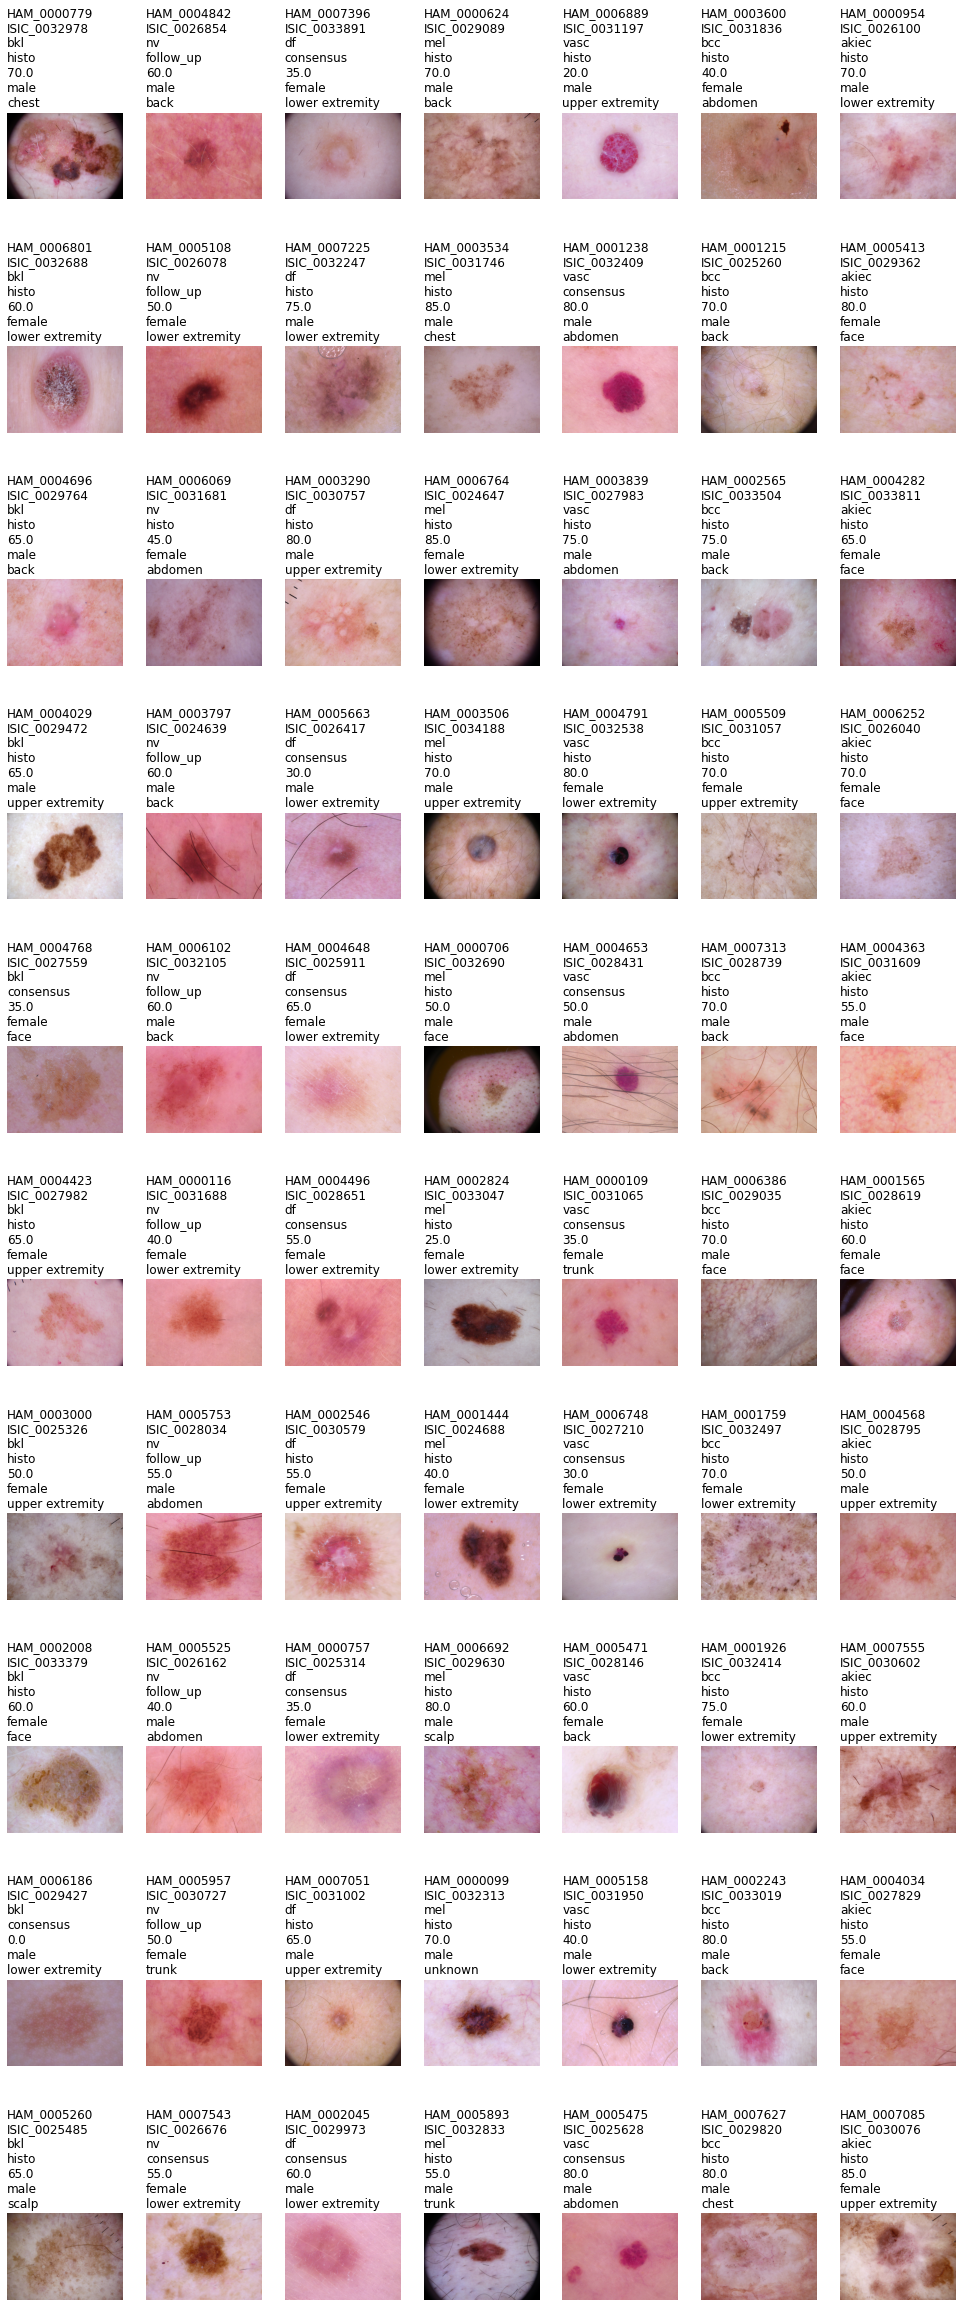

In [6]:
# Let's have a look at the randomly selected images. In the grid,
# each column will consist of images of one kind of lesion.

plt.figure(figsize=(17, 17))

for i in range(k):
    dx = lesions[i]
    for j in range(m):            
        img_id = random_images[dx][j]
        image = random_images_array[i,j]
        ax = plt.subplot(m, k, j*k + i + 1)
        plt.subplots_adjust(top=2)
        plt.imshow(image)
        [[lesion_id, image_id, dx, dx_type, age, sex, localization]] = HAM10000_metadata[HAM10000_metadata['image_id'] == img_id].values
        plt.title(lesion_id + '\n' + image_id + '\n' + dx + '\n' + dx_type + '\n' + f'{age}' + '\n' + sex + '\n' + localization, loc='left')
        plt.axis('off')

In [7]:
# We now return to the 'metadata' dataframe. Let's view a summary
# of it.
HAM10000_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [8]:
# Notice that the non-null count for age is less than that of the
# other columns. This alerts us to missing values.

for col in HAM10000_metadata.columns:
    if col in HAM10000_metadata[['lesion_id', 'image_id']].columns:
        print(f'Column: {col}. Number of unique values: {HAM10000_metadata[col].unique().shape[0]}.')
    else:
        unique_values = sorted(HAM10000_metadata[col].unique())
        print(f'Column: {col}. Number of unique values: {HAM10000_metadata[col].unique().shape[0]}. Values: {unique_values}.')
    print('\n')

Column: lesion_id. Number of unique values: 7470.


Column: image_id. Number of unique values: 10015.


Column: dx. Number of unique values: 7. Values: ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'].


Column: dx_type. Number of unique values: 4. Values: ['confocal', 'consensus', 'follow_up', 'histo'].


Column: age. Number of unique values: 19. Values: [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, nan].


Column: sex. Number of unique values: 3. Values: ['female', 'male', 'unknown'].


Column: localization. Number of unique values: 15. Values: ['abdomen', 'acral', 'back', 'chest', 'ear', 'face', 'foot', 'genital', 'hand', 'lower extremity', 'neck', 'scalp', 'trunk', 'unknown', 'upper extremity'].




In [9]:
# Note the   'nan' value  in  the 'age' column,  and the 'unknown'
# value in 'sex'  and 'localization' columns.  For now, let's turn
# our   attention to the     fact  that  the  number     of unique
# 'lesion_id'    values  is  less   than  the    number  of unique
# 'image_id' values: we must have multiple images for some  of the
# lesions.

# We can view the lesions for which there is more than one image.
HAM10000_metadata_duplicates = HAM10000_metadata[HAM10000_metadata.duplicated(subset='lesion_id')].sort_values('lesion_id')
HAM10000_metadata_duplicates.head()

lesion_id      image_id     dx dx_type   age     sex     localization
9188  HAM_0000000  ISIC_0025346     nv   histo  60.0    male             back
1661  HAM_0000002  ISIC_0032622    mel   histo  65.0  female  lower extremity
1662  HAM_0000002  ISIC_0034246    mel   histo  65.0  female  lower extremity
9899  HAM_0000005  ISIC_0030591  akiec   histo  75.0  female  lower extremity
9900  HAM_0000005  ISIC_0024579  akiec   histo  75.0  female  lower extremity

In [10]:
# For instance:
HAM10000_metadata[HAM10000_metadata['lesion_id'] == HAM10000_metadata_duplicates.iloc[0]['lesion_id']]

lesion_id      image_id  dx dx_type   age   sex localization
9187  HAM_0000000  ISIC_0028498  nv   histo  60.0  male         back
9188  HAM_0000000  ISIC_0025346  nv   histo  60.0  male         back

In [11]:
# We insert a 'no_of_images' column giving the number of images
# of each lesion.

# HAM10000_metadata['no_of_images'] = HAM10000_metadata.groupby(['lesion_id'])['lesion_id'].transform('count')
# HAM10000_metadata['no_of_images'] = HAM10000_metadata['lesion_id'].map(HAM10000_metadata['lesion_id'].value_counts())
HAM10000_metadata.insert(1,'no_of_images', HAM10000_metadata['lesion_id'].map(HAM10000_metadata['lesion_id'].value_counts()))
HAM10000_metadata.head()

lesion_id  no_of_images      image_id   dx dx_type   age   sex  \
0  HAM_0000118             2  ISIC_0027419  bkl   histo  80.0  male   
1  HAM_0000118             2  ISIC_0025030  bkl   histo  80.0  male   
2  HAM_0002730             2  ISIC_0026769  bkl   histo  80.0  male   
3  HAM_0002730             2  ISIC_0025661  bkl   histo  80.0  male   
4  HAM_0001466             2  ISIC_0031633  bkl   histo  75.0  male   

  localization  
0        scalp  
1        scalp  
2        scalp  
3        scalp  
4          ear

In [12]:
# There can be anywhere from 1 to 6 images of a given lesion in
# our dataset:
sorted(HAM10000_metadata['no_of_images'].unique())

[1, 2, 3, 4, 5, 6]

In [13]:
# There are four distinct lesions for which we have six images in
# the dataset.
HAM10000_metadata[HAM10000_metadata['no_of_images'] == 6]['lesion_id'].unique()

array(['HAM_0003789', 'HAM_0000835', 'HAM_0001863', 'HAM_0005263'],
      dtype=object)

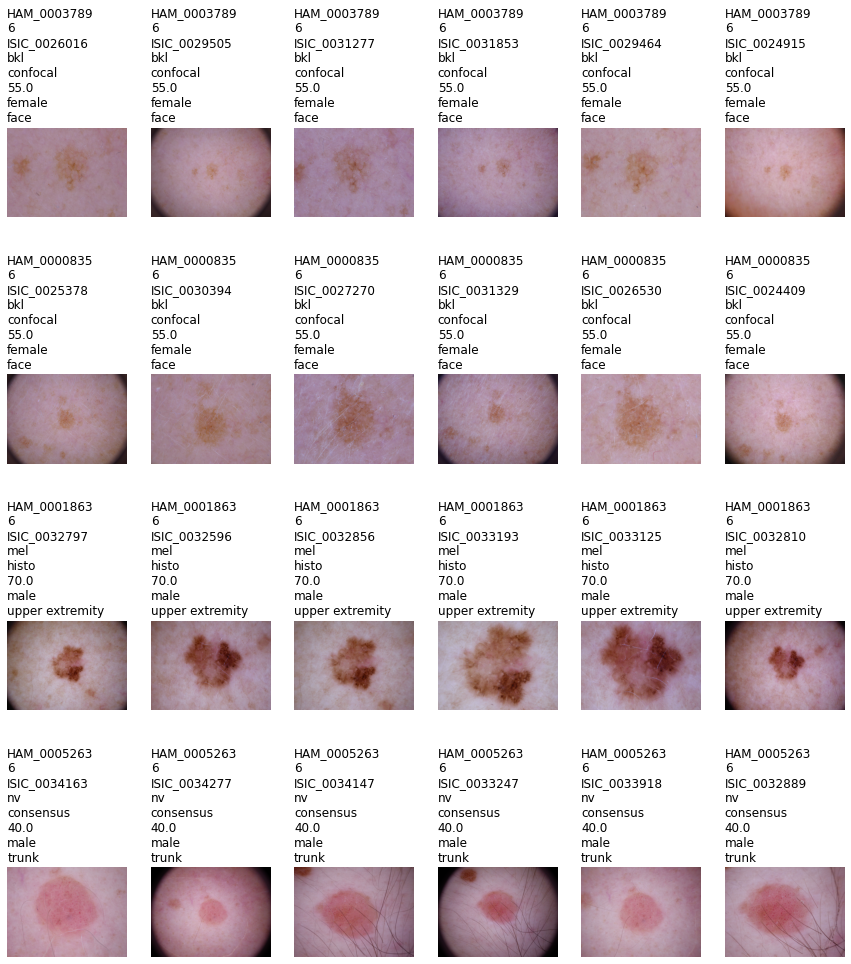

In [14]:
# Let's have  a look at the  24 images of those four lesions. Each
# of  the four rows will contain   six  images corresponding  to a
# single lesion. As we  can see, for each  given  distinct lesion,
# the six images are not merely copies of each other, but show the
# lesion under various lighting/magnification/angles/etc.

m = 6
lesions = HAM10000_metadata[HAM10000_metadata['no_of_images'] == m]['lesion_id'].unique()
k = len(lesions)

plt.figure(figsize=(15, 15))

for i in range(k):
    lesion_id = lesions[i]
    images = HAM10000_metadata[HAM10000_metadata['lesion_id'] == lesion_id]['image_id'].values
    for j in range(m):            
        img_id = images[j]
        image = np.asarray(Image.open(path_to_images + img_id + img_ext))
        ax = plt.subplot(k, m, i*m + j + 1)
        plt.subplots_adjust(top=1)
        plt.imshow(image)
        [[lesion_id, no_of_images, image_id, dx, dx_type, age, sex, localization]] = HAM10000_metadata[HAM10000_metadata['image_id'] == img_id].values
        plt.title(lesion_id + '\n' + f'{no_of_images}' + '\n' + image_id + '\n' + dx + '\n' + dx_type + '\n' + f'{age}' + '\n' + sex + '\n' + localization, loc='left')
        plt.axis('off')

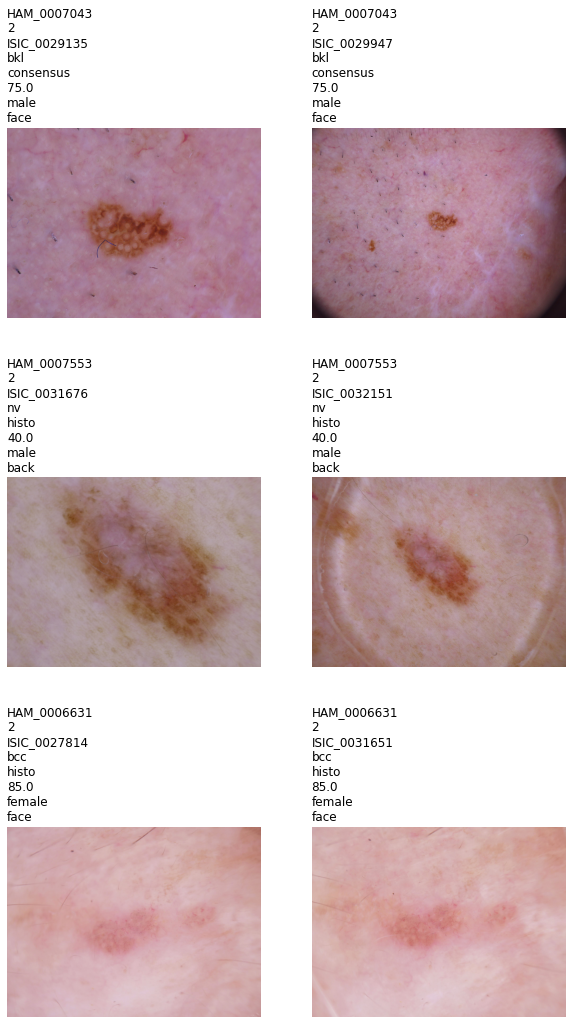

In [15]:
# Let's just  repeat the above experiment for a few random lesions
# for which there are m images, for any desired m between 1 and 6.
# Each time this cell is run,  a  new subset of three lesions will
# be generated.

# We are satisfied that there is probably no image per se that is
# duplicated.

m = 2

lesions = np.random.choice(HAM10000_metadata[HAM10000_metadata['no_of_images'] == m]['lesion_id'].unique(),3)
k = len(lesions)

plt.figure(figsize=(10, 10))

for i in range(k):
    lesion_id = lesions[i]
    images = HAM10000_metadata[HAM10000_metadata['lesion_id'] == lesion_id]['image_id'].values
    for j in range(m):            
        img_id = images[j]
        image = np.asarray(Image.open(path_to_images + img_id + img_ext))
        ax = plt.subplot(k, m, i*m + j + 1)
        plt.subplots_adjust(top=1 + 1/m)
        plt.imshow(image)
        [[lesion_id, no_of_images, image_id, dx, dx_type, age, sex, localization]] = HAM10000_metadata[HAM10000_metadata['image_id'] == img_id].values
        plt.title(lesion_id + '\n' + f'{no_of_images}' + '\n' + image_id + '\n' + dx + '\n' + dx_type + '\n' + f'{age}' + '\n' + sex + '\n' + localization, loc='left')
        plt.axis('off')

In [15]:
# We create a dataframe consisting of precisely one 'image_id' for
# each lesion.  For each lesion,  we keep the row corresponding to
# the first occurrence of 'lesion_id', and drop the rest.
HAM10000_metadata_unique = HAM10000_metadata.drop_duplicates(subset=['lesion_id'], keep='first')
HAM10000_metadata_unique.head()

lesion_id  no_of_images      image_id   dx dx_type   age     sex  \
0  HAM_0000118             2  ISIC_0027419  bkl   histo  80.0    male   
2  HAM_0002730             2  ISIC_0026769  bkl   histo  80.0    male   
4  HAM_0001466             2  ISIC_0031633  bkl   histo  75.0    male   
6  HAM_0002761             2  ISIC_0029176  bkl   histo  60.0    male   
8  HAM_0005132             2  ISIC_0025837  bkl   histo  70.0  female   

  localization  
0        scalp  
2        scalp  
4          ear  
6         face  
8         back

In [16]:
# Let's   investigage the   distribution    of  diagnoses  ('dx'),
# diagnosis type ('dx_type'), 'age', 'sex', and 'localization'. We
# may also be interested in such questions as: What  proportion of
# melanoma lesions comes from  a (fe)male patient? What proportion
# melanocytic  nevi come from  a 40 year old patient? And so on...

def HAM10000_freq(*args, include_duplicates=False):
    '''
    Inputs: *args (string(s)), include_duplicates (boolean)

    Either args = (col1) or args = (col1, value, col2), where col1
    is a  column name ('dx', 'dx_type', etc.), value is a possible
    value within the corresponding   column (e.g.  'mel', 'histo',
    etc.),  and col2 is another  column  name (e.g.  'age', 'sex',
    'localization').

    include_duplicates is False by default. If False, we consider
    the dataframe  in which there  is  exactly one image  of each
    lesion. If True, we consider the dataframe in which there are
    multiple images of some lesions.

    Returns: output, a dataframe.

    In case  args = (col1),  output gives the frequencies (absolute
    and  relative) for all of the   different  values found  in the
    relevant dataframe under column  col1.  In case  args  = (col1,
    value, col2), we restrict  the relevant dataframe to rows where
    only value appears  under column col1, and in _that_ restricted
    dataframe, output gives the frequencies (absolute and relative)
    of all of the different values under col2.
    '''
    if include_duplicates:
        df = HAM10000_metadata
    else:
        df = HAM10000_metadata_unique
    if len(args) == 1:
        col = df[args[0]]
        output = pd.concat([col.value_counts(dropna=False), col.value_counts(normalize=True,dropna=False).mul(100).round(2)],axis=1, keys=['freq', '%'])
        output.index.names = [args[0]]
        return output 
    else:
        col1, value, col2 = args[0], args[1], args[2]
        col = df[df[col1] == value][col2]
        output = pd.concat([col.value_counts(dropna=False), col.value_counts(normalize=True,dropna=False).mul(100).round(2)],axis=1, keys=['freq', '%'])
        output.index.names = [col2]
        return output

In [17]:
# We see  that more than 25% of lesions in our dataset were imaged
# more than once. In what follows,  we will look at frequencies of
# distinct lesions, as well as frequencies of images (i.e. lesions
# counted with multiplicity).

HAM10000_freq('no_of_images', include_duplicates=False).T

no_of_images        1        2       3      4     5     6
freq          5514.00  1423.00  490.00  34.00  5.00  4.00
%               73.82    19.05    6.56   0.46  0.07  0.05

In [36]:
# Let's get the distributions for 'dx', 'dx_type', etc., in one
# fell swoop.

# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if include_duplicates:
    for column_name in ['dx', 'dx_type', 'age', 'sex', 'localization']:
        print(column_name + ' (images)')
        display(HAM10000_freq(column_name, include_duplicates=True).T)
else:
    for column_name in ['dx', 'dx_type', 'age', 'sex', 'localization']:
        print(column_name + ' (distinct lesions)')
        display(HAM10000_freq(column_name, include_duplicates=False).T) 

dx (distinct lesions)


dx         nv     bkl     mel     bcc   akiec   vasc     df
freq  5403.00  727.00  614.00  327.00  228.00  98.00  73.00
%       72.33    9.73    8.22    4.38    3.05   1.31   0.98

dx_type (distinct lesions)


dx_type  follow_up   histo  consensus  confocal
freq       3704.00  3085.0     647.00     34.00
%            49.59    41.3       8.66      0.46

age (distinct lesions)


age      45.0    50.0    40.0    55.0    60.0    35.0    65.0    70.0    75.0  \
freq  1080.00  987.00  787.00  780.00  600.00  570.00  515.00  503.00  430.00   
%       14.46   13.21   10.54   10.44    8.03    7.63    6.89    6.73    5.76   

age     30.0    80.0   85.0    25.0    20.0  NaN    5.0   15.0   10.0   0.0   
freq  312.00  278.00  179.0  161.00  101.00  52.0  47.00  45.0  22.00  21.00  
%       4.18    3.72    2.4    2.16    1.35   0.7   0.63   0.6   0.29   0.28

sex (distinct lesions)


sex      male   female  unknown
freq  4001.00  3419.00    50.00
%       53.56    45.77     0.67

localization (distinct lesions)


localization  lower extremity     back    trunk  abdomen  upper extremity  \
freq                   1584.0  1534.00  1269.00    822.0           776.00   
%                        21.2    20.54    16.99     11.0            10.39   

localization    face   chest    foot  unknown    neck  scalp   hand  genital  \
freq          470.00  240.00  228.00   203.00  119.00  78.00  64.00     45.0   
%               6.29    3.21    3.05     2.72    1.59   1.04   0.86      0.6   

localization    ear  acral  
freq          35.00   3.00  
%              0.47   0.04

In [19]:
# And now the probability that a lesion belongs to a male/female,
# given that it is melanoma.

# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if not include_duplicates:
    print('Melanoma (distinct lesions).\n')
else:
    print('Melanoma (images).\n')
    
print('Prob(sex | mel)')
display(HAM10000_freq('dx', 'mel','sex',include_duplicates).T)

Melanoma (distinct lesions).

Prob(sex | mel)


sex     male  female
freq  371.00  243.00
%      60.42   39.58

In [32]:
# What about the probability that a lesion is melanoma, given that
# it comes from a male/female?

# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if not include_duplicates:
    df = HAM10000_metadata_unique
    print('Diagnosis (distinct lesions).\n')
    print('Caveat: the number for males/females is not necessarily the number of _distinct_ males/females. For instance, we have 2,584 distinct nevi that come from a male and 2,778 distinct nevi that come from a female, but it is possible that two or more distinct nevi come from the same male/female.\n')
else:
    df = HAM10000_metadata
    print('Diagnosis (images).\n')

# We could use 
# display(HAM10000_freq('sex', 'male','dx',include_duplicates).T)
# and 
# display(HAM10000_freq('sex', 'female','dx',include_duplicates).T)
# but there is a better way to do this kind of thing...

A = 'dx'
B = 'sex'
AgivenBabs = pd.crosstab(df[A], df[B])
AgivenB = pd.crosstab(df[A],df[B],normalize='columns').mul(100).round(2)

print(f'#dx given sex')
display(AgivenBabs)

print(f'Prob(dx | sex) (displayed as a percentage)')
display(AgivenB)

Diagnosis (distinct lesions).

Caveat: the number for males/females is not necessarily the number of _distinct_ males/females. For instance, we have 2,584 distinct nevi that come from a male and 2,778 distinct nevi that come from a female, but it is possible that two or more distinct nevi come from the same male/female.

#dx given sex


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0

Prob(dx | sex) (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0

In [34]:
# Let's look at all the conditional probabilities...

# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if not include_duplicates:
    df = HAM10000_metadata_unique
    print(f'CONSIDERING ALL {df.shape[0]} *DISTINCT* LESIONS...\n')
else:
    df = HAM10000_metadata
    print(f'CONSIDERING ALL {df.shape[0]} IMAGES (LESIONS COUNTED WITH MULTIPLICITY)...\n')

diagnoses = df['dx'].unique()
n = len(diagnoses)
sex = ['male + female', 'male', 'female']
m = len(sex)
features = ['sex', 'age', 'dx_type', 'localization']
k = len(features)

for h in range(n):
    dx = diagnoses[h]
    for i in range(k):
        for j in range(m):
            feature, gender = features[i], sex[j] 
            if feature == 'sex' and (gender != 'male + female'):
                pass
            else:
                if gender == 'male + female': # j == 2
                    data = df
                else:
                    data = df[df['sex'] == gender]
                A = 'dx'
                B = feature
                AgivenBabs = pd.crosstab(data[A], data[B])
                AgivenB = pd.crosstab(data[A], data[B], normalize='columns').mul(100).round(2)
                BgivenAabs = pd.crosstab(data[B], data[A])
                BgivenA = pd.crosstab(data[B], data[A], normalize='columns').mul(100).round(2)
                print(f'#{A} given {B} \n({gender})')
                display(AgivenBabs)
                print('\n')
                print(f'Prob({A} | {B}) \n{gender} (displayed as a percentage)')
                display(AgivenB)
                print('\n')
                print(f'#{B} given {A} \n({gender})')
                display(BgivenAabs)
                print('\n')
                print(f'Prob({B} | {A}) \n{gender} (displayed as a percentage)')
                display(BgivenA)
                print('\n')

CONSIDERING ALL 7470 *DISTINCT* LESIONS...

#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17



#dx given sex 
(male + female)


sex    female  male  unknown
dx                          
akiec      80   148        0
bcc       122   205        0
bkl       304   414        9
df         38    35        0
mel       243   371        0
nv       2584  2778       41
vasc       48    50        0



Prob(dx | sex) 
male + female (displayed as a percentage)


sex    female   male  unknown
dx                           
akiec    2.34   3.70      0.0
bcc      3.57   5.12      0.0
bkl      8.89  10.35     18.0
df       1.11   0.87      0.0
mel      7.11   9.27      0.0
nv      75.58  69.43     82.0
vasc     1.40   1.25      0.0



#sex given dx 
(male + female)


dx       akiec  bcc  bkl  df  mel    nv  vasc
sex                                          
female      80  122  304  38  243  2584    48
male       148  205  414  35  371  2778    50
unknown      0    0    9   0    0    41     0



Prob(sex | dx) 
male + female (displayed as a percentage)


dx       akiec    bcc    bkl     df    mel     nv   vasc
sex                                                     
female   35.09  37.31  41.82  52.05  39.58  47.83  48.98
male     64.91  62.69  56.95  47.95  60.42  51.42  51.02
unknown   0.00   0.00   1.24   0.00   0.00   0.76   0.00



#dx given age 
(male + female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     6     7    13    18   
bcc       0     0     0     0     1     1     2     2    15    17    18    18   
bkl       3     1     0     0     0     0     3    18    25    39    63    58   
df        0     0     0     0     0     1     3     8     6     8    10     9   
mel       0     1     0     0     4     7    16    19    27    39    49    72   
nv       16    43    21    43    94   150   283   517   705   959   823   591   
vasc      2     2     1     2     2     2     4     6     3    11    11    14   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    42    27    39    30    26    19  
bcc      25    47    52    47    49    33  
bkl      82    71   128   103    69    55  
df        8    11     3     5     1     0  
mel      65    75    89    59    48    43  
nv      371   281   183   178    77    26  
vasc      7     3     9     8     8     3



Prob(dx | age) 
male + female (displayed as a percentage)


age     0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                            
akiec   0.00   0.00   0.00   0.00   0.00   0.00   0.32   0.00   0.76   0.65   
bcc     0.00   0.00   0.00   0.00   0.99   0.62   0.64   0.35   1.91   1.57   
bkl    14.29   2.13   0.00   0.00   0.00   0.00   0.96   3.16   3.18   3.61   
df      0.00   0.00   0.00   0.00   0.00   0.62   0.96   1.40   0.76   0.74   
mel     0.00   2.13   0.00   0.00   3.96   4.35   5.13   3.33   3.43   3.61   
nv     76.19  91.49  95.45  95.56  93.07  93.17  90.71  90.70  89.58  88.80   
vasc    9.52   4.26   4.55   4.44   1.98   1.24   1.28   1.05   0.38   1.02   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   1.32   2.31   7.00   5.24   7.75   6.98   9.35  10.61  
bcc     1.82   2.31   4.17   9.13  10.34  10.93  17.63  18.44  
bkl     6.38   7.44  13.67  13.79  25.45  23.95  24.82  30.73  
df      1.01   1.15   1.33   2.14   0.60   1.16   0.36   0.00  
mel     4.96   9.23  10.83  14.56  17.69  13.72  17.27  24.02  
nv     83.38  75.77  61.83  54.56  36.38  41.40  27.70  14.53  
vasc    1.11   1.79   1.17   0.58   1.79   1.86   2.88   1.68



#age given dx 
(male + female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    3   0    0   16     2
5.0       0    0    1   0    1   43     2
10.0      0    0    0   0    0   21     1
15.0      0    0    0   0    0   43     2
20.0      0    1    0   0    4   94     2
25.0      0    1    0   1    7  150     2
30.0      1    2    3   3   16  283     4
35.0      0    2   18   8   19  517     6
40.0      6   15   25   6   27  705     3
45.0      7   17   39   8   39  959    11
50.0     13   18   63  10   49  823    11
55.0     18   18   58   9   72  591    14
60.0     42   25   82   8   65  371     7
65.0     27   47   71  11   75  281     3
70.0     39   52  128   3   89  183     9
75.0     30   47  103   5   59  178     8
80.0     26   49   69   1   48   77     8
85.0     19   33   55   0   43   26     3



Prob(age | dx) 
male + female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.42   0.00   0.00   0.30   2.04
5.0    0.00   0.00   0.14   0.00   0.16   0.80   2.04
10.0   0.00   0.00   0.00   0.00   0.00   0.39   1.02
15.0   0.00   0.00   0.00   0.00   0.00   0.80   2.04
20.0   0.00   0.31   0.00   0.00   0.65   1.75   2.04
25.0   0.00   0.31   0.00   1.37   1.14   2.80   2.04
30.0   0.44   0.61   0.42   4.11   2.61   5.28   4.08
35.0   0.00   0.61   2.51  10.96   3.10   9.64   6.12
40.0   2.63   4.59   3.48   8.22   4.40  13.15   3.06
45.0   3.07   5.20   5.43  10.96   6.36  17.89  11.22
50.0   5.70   5.50   8.77  13.70   7.99  15.35  11.22
55.0   7.89   5.50   8.08  12.33  11.75  11.02  14.29
60.0  18.42   7.65  11.42  10.96  10.60   6.92   7.14
65.0  11.84  14.37   9.89  15.07  12.23   5.24   3.06
70.0  17.11  15.90  17.83   4.11  14.52   3.41   9.18
75.0  13.16  14.37  14.35   6.85   9.62   3.32   8.16
80.0  11.40  14.98   9.61   1.37   7.83   1.44   8.16
85.0   8.33  10.09   7.66   0.00   7.01   0.48   3.06



#dx given age 
(male)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     1     0     3     7    10     8   
bcc       0     0     0     0     0     1     0     2     5    11    10    12   
bkl       1     1     0     0     0     0     1     8    15    21    37    36   
df        0     0     0     0     0     0     3     0     3     3     5     4   
mel       0     1     0     0     2     2     5     6     8    19    28    47   
nv       11    29     6    14    42    67   133   241   333   433   387   323   
vasc      0     2     1     2     2     0     1     2     2     2     6     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    27    16    24    22    15    15  
bcc      15    24    36    32    36    21  
bkl      34    43    66    64    53    34  
df        5     5     3     3     1     0  
mel      40    51    59    41    33    28  
nv      241   170   134   122    70    20  
vasc      3     0     4     7     7     2



Prob(dx | age) 
male (displayed as a percentage)


age     0.0    5.0    10.0  15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.00   0.00   0.00   0.0   0.00   0.00   0.69   0.00   0.81   1.41   
bcc     0.00   0.00   0.00   0.0   0.00   1.43   0.00   0.77   1.36   2.22   
bkl     8.33   3.03   0.00   0.0   0.00   0.00   0.69   3.09   4.07   4.23   
df      0.00   0.00   0.00   0.0   0.00   0.00   2.08   0.00   0.81   0.60   
mel     0.00   3.03   0.00   0.0   4.35   2.86   3.47   2.32   2.17   3.83   
nv     91.67  87.88  85.71  87.5  91.30  95.71  92.36  93.05  90.24  87.30   
vasc    0.00   6.06  14.29  12.5   4.35   0.00   0.69   0.77   0.54   0.40   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   2.07   1.83   7.40   5.18   7.36   7.56   6.98  12.50  
bcc     2.07   2.75   4.11   7.77  11.04  11.00  16.74  17.50  
bkl     7.66   8.24   9.32  13.92  20.25  21.99  24.65  28.33  
df      1.04   0.92   1.37   1.62   0.92   1.03   0.47   0.00  
mel     5.80  10.76  10.96  16.50  18.10  14.09  15.35  23.33  
nv     80.12  73.91  66.03  55.02  41.10  41.92  32.56  16.67  
vasc    1.24   1.60   0.82   0.00   1.23   2.41   3.26   1.67



#age given dx 
(male)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    1   0    0   11     0
5.0       0    0    1   0    1   29     2
10.0      0    0    0   0    0    6     1
15.0      0    0    0   0    0   14     2
20.0      0    0    0   0    2   42     2
25.0      0    1    0   0    2   67     0
30.0      1    0    1   3    5  133     1
35.0      0    2    8   0    6  241     2
40.0      3    5   15   3    8  333     2
45.0      7   11   21   3   19  433     2
50.0     10   10   37   5   28  387     6
55.0      8   12   36   4   47  323     7
60.0     27   15   34   5   40  241     3
65.0     16   24   43   5   51  170     0
70.0     24   36   66   3   59  134     4
75.0     22   32   64   3   41  122     7
80.0     15   36   53   1   33   70     7
85.0     15   21   34   0   28   20     2



Prob(age | dx) 
male (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv  vasc
age                                                 
0.0    0.00   0.00   0.24   0.00   0.00   0.40   0.0
5.0    0.00   0.00   0.24   0.00   0.27   1.04   4.0
10.0   0.00   0.00   0.00   0.00   0.00   0.22   2.0
15.0   0.00   0.00   0.00   0.00   0.00   0.50   4.0
20.0   0.00   0.00   0.00   0.00   0.54   1.51   4.0
25.0   0.00   0.49   0.00   0.00   0.54   2.41   0.0
30.0   0.68   0.00   0.24   8.57   1.35   4.79   2.0
35.0   0.00   0.98   1.93   0.00   1.62   8.68   4.0
40.0   2.03   2.44   3.62   8.57   2.16  12.00   4.0
45.0   4.73   5.37   5.07   8.57   5.14  15.60   4.0
50.0   6.76   4.88   8.94  14.29   7.57  13.94  12.0
55.0   5.41   5.85   8.70  11.43  12.70  11.64  14.0
60.0  18.24   7.32   8.21  14.29  10.81   8.68   6.0
65.0  10.81  11.71  10.39  14.29  13.78   6.12   0.0
70.0  16.22  17.56  15.94   8.57  15.95   4.83   8.0
75.0  14.86  15.61  15.46   8.57  11.08   4.39  14.0
80.0  10.14  17.56  12.80   2.86   8.92   2.52  14.0
85.0  10.14  10.24   8.21   0.00   7.57   0.72   4.0



#dx given age 
(female)


age    0.0   5.0   10.0  15.0  20.0  25.0  30.0  35.0  40.0  45.0  50.0  55.0  \
dx                                                                              
akiec     0     0     0     0     0     0     0     0     3     0     3    10   
bcc       0     0     0     0     1     0     2     0    10     6     8     6   
bkl       2     0     0     0     0     0     2    10    10    18    26    22   
df        0     0     0     0     0     1     0     8     3     5     5     5   
mel       0     0     0     0     2     5    11    13    19    20    21    25   
nv        4    14    15    29    52    83   150   275   372   525   436   268   
vasc      2     0     0     0     0     2     3     4     1     9     5     7   

age    60.0  65.0  70.0  75.0  80.0  85.0  
dx                                         
akiec    15    11    15     8    11     4  
bcc      10    23    16    15    13    12  
bkl      48    28    62    39    16    21  
df        3     6     0     2     0     0  
mel      25    24    30    18    15    15  
nv      129   111    49    56     7     6  
vasc      4     3     5     1     1     1



Prob(dx | age) 
female (displayed as a percentage)


age    0.0    5.0    10.0   15.0   20.0   25.0   30.0   35.0   40.0   45.0  \
dx                                                                           
akiec   0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   0.72   0.00   
bcc     0.0    0.0    0.0    0.0   1.82   0.00   1.19   0.00   2.39   1.03   
bkl    25.0    0.0    0.0    0.0   0.00   0.00   1.19   3.23   2.39   3.09   
df      0.0    0.0    0.0    0.0   0.00   1.10   0.00   2.58   0.72   0.86   
mel     0.0    0.0    0.0    0.0   3.64   5.49   6.55   4.19   4.55   3.43   
nv     50.0  100.0  100.0  100.0  94.55  91.21  89.29  88.71  89.00  90.05   
vasc   25.0    0.0    0.0    0.0   0.00   2.20   1.79   1.29   0.24   1.54   

age     50.0   55.0   60.0   65.0   70.0   75.0   80.0   85.0  
dx                                                             
akiec   0.60   2.92   6.41   5.34   8.47   5.76  17.46   6.78  
bcc     1.59   1.75   4.27  11.17   9.04  10.79  20.63  20.34  
bkl     5.16   6.41  20.51  13.59  35.03  28.06  25.40  35.59  
df      0.99   1.46   1.28   2.91   0.00   1.44   0.00   0.00  
mel     4.17   7.29  10.68  11.65  16.95  12.95  23.81  25.42  
nv     86.51  78.13  55.13  53.88  27.68  40.29  11.11  10.17  
vasc    0.99   2.04   1.71   1.46   2.82   0.72   1.59   1.69



#age given dx 
(female)


dx    akiec  bcc  bkl  df  mel   nv  vasc
age                                      
0.0       0    0    2   0    0    4     2
5.0       0    0    0   0    0   14     0
10.0      0    0    0   0    0   15     0
15.0      0    0    0   0    0   29     0
20.0      0    1    0   0    2   52     0
25.0      0    0    0   1    5   83     2
30.0      0    2    2   0   11  150     3
35.0      0    0   10   8   13  275     4
40.0      3   10   10   3   19  372     1
45.0      0    6   18   5   20  525     9
50.0      3    8   26   5   21  436     5
55.0     10    6   22   5   25  268     7
60.0     15   10   48   3   25  129     4
65.0     11   23   28   6   24  111     3
70.0     15   16   62   0   30   49     5
75.0      8   15   39   2   18   56     1
80.0     11   13   16   0   15    7     1
85.0      4   12   21   0   15    6     1



Prob(age | dx) 
female (displayed as a percentage)


dx    akiec    bcc    bkl     df    mel     nv   vasc
age                                                  
0.0    0.00   0.00   0.66   0.00   0.00   0.15   4.17
5.0    0.00   0.00   0.00   0.00   0.00   0.54   0.00
10.0   0.00   0.00   0.00   0.00   0.00   0.58   0.00
15.0   0.00   0.00   0.00   0.00   0.00   1.12   0.00
20.0   0.00   0.82   0.00   0.00   0.82   2.01   0.00
25.0   0.00   0.00   0.00   2.63   2.06   3.22   4.17
30.0   0.00   1.64   0.66   0.00   4.53   5.81   6.25
35.0   0.00   0.00   3.29  21.05   5.35  10.65   8.33
40.0   3.75   8.20   3.29   7.89   7.82  14.41   2.08
45.0   0.00   4.92   5.92  13.16   8.23  20.34  18.75
50.0   3.75   6.56   8.55  13.16   8.64  16.89  10.42
55.0  12.50   4.92   7.24  13.16  10.29  10.38  14.58
60.0  18.75   8.20  15.79   7.89  10.29   5.00   8.33
65.0  13.75  18.85   9.21  15.79   9.88   4.30   6.25
70.0  18.75  13.11  20.39   0.00  12.35   1.90  10.42
75.0  10.00  12.30  12.83   5.26   7.41   2.17   2.08
80.0  13.75  10.66   5.26   0.00   6.17   0.27   2.08
85.0   5.00   9.84   6.91   0.00   6.17   0.23   2.08



#dx given dx_type 
(male + female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    228
bcc             0          0          0    327
bkl            34        206          0    487
df              0         44          0     29
mel             0          0          0    614
nv              0        332       3704   1367
vasc            0         65          0     33



Prob(dx | dx_type) 
male + female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   7.39
bcc           0.0       0.00        0.0  10.60
bkl         100.0      31.84        0.0  15.79
df            0.0       6.80        0.0   0.94
mel           0.0       0.00        0.0  19.90
nv            0.0      51.31      100.0  44.31
vasc          0.0      10.05        0.0   1.07



#dx_type given dx 
(male + female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   34   0    0     0     0
consensus      0    0  206  44    0   332    65
follow_up      0    0    0   0    0  3704     0
histo        228  327  487  29  614  1367    33



Prob(dx_type | dx) 
male + female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   4.68   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.34  60.27    0.0   6.14  66.33
follow_up    0.0    0.0   0.00   0.00    0.0  68.55   0.00
histo      100.0  100.0  66.99  39.73  100.0  25.30  33.67



#dx given dx_type 
(male)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0    148
bcc             0          0          0    205
bkl            15        109          0    290
df              0         15          0     20
mel             0          0          0    371
nv              0        155       1922    701
vasc            0         33          0     17



Prob(dx | dx_type) 
male (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   8.45
bcc           0.0       0.00        0.0  11.70
bkl         100.0      34.94        0.0  16.55
df            0.0       4.81        0.0   1.14
mel           0.0       0.00        0.0  21.18
nv            0.0      49.68      100.0  40.01
vasc          0.0      10.58        0.0   0.97



#dx_type given dx 
(male)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   15   0    0     0     0
consensus      0    0  109  15    0   155    33
follow_up      0    0    0   0    0  1922     0
histo        148  205  290  20  371   701    17



Prob(dx_type | dx) 
male (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv  vasc
dx_type                                                  
confocal     0.0    0.0   3.62   0.00    0.0   0.00   0.0
consensus    0.0    0.0  26.33  42.86    0.0   5.58  66.0
follow_up    0.0    0.0   0.00   0.00    0.0  69.19   0.0
histo      100.0  100.0  70.05  57.14  100.0  25.23  34.0



#dx given dx_type 
(female)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec           0          0          0     80
bcc             0          0          0    122
bkl            19         88          0    197
df              0         29          0      9
mel             0          0          0    243
nv              0        140       1782    662
vasc            0         32          0     16



Prob(dx | dx_type) 
female (displayed as a percentage)


dx_type  confocal  consensus  follow_up  histo
dx                                            
akiec         0.0       0.00        0.0   6.02
bcc           0.0       0.00        0.0   9.18
bkl         100.0      30.45        0.0  14.82
df            0.0      10.03        0.0   0.68
mel           0.0       0.00        0.0  18.28
nv            0.0      48.44      100.0  49.81
vasc          0.0      11.07        0.0   1.20



#dx_type given dx 
(female)


dx         akiec  bcc  bkl  df  mel    nv  vasc
dx_type                                        
confocal       0    0   19   0    0     0     0
consensus      0    0   88  29    0   140    32
follow_up      0    0    0   0    0  1782     0
histo         80  122  197   9  243   662    16



Prob(dx_type | dx) 
female (displayed as a percentage)


dx         akiec    bcc    bkl     df    mel     nv   vasc
dx_type                                                   
confocal     0.0    0.0   6.25   0.00    0.0   0.00   0.00
consensus    0.0    0.0  28.95  76.32    0.0   5.42  66.67
follow_up    0.0    0.0   0.00   0.00    0.0  68.96   0.00
histo      100.0  100.0  64.80  23.68  100.0  25.62  33.33



#dx given localization 
(male + female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               3      0    22      9    2    84     0        0     8   
bcc                 9      0   123     32    0    61     2        0     1   
bkl                36      0   133     50    4   194     1        1    12   
df                  2      0     1      0    0     0     1        1     0   
mel                31      0   185     34   10    65    15        0     1   
nv                719      3  1058    112   19    61   209       43    39   
vasc               22      0    12      3    0     5     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      41     8      8      1        0               42  
bcc                        36    11     11      6        3               32  
bkl                       109    20     24     57       19               67  
df                         54     0      0      0        0               14  
mel                       104    18      9     25        6              111  
nv                       1224    60     24   1153      175              504  
vasc                       16     2      2     27        0                6



Prob(dx | localization) 
male + female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.36    0.0   1.43   3.75   5.71  17.87   0.00     0.00   
bcc              1.09    0.0   8.02  13.33   0.00  12.98   0.88     0.00   
bkl              4.38    0.0   8.67  20.83  11.43  41.28   0.44     2.22   
df               0.24    0.0   0.07   0.00   0.00   0.00   0.44     2.22   
mel              3.77    0.0  12.06  14.17  28.57  13.83   6.58     0.00   
nv              87.47  100.0  68.97  46.67  54.29  12.98  91.67    95.56   
vasc             2.68    0.0   0.78   1.25   0.00   1.06   0.00     0.00   

localization   hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                   
akiec         12.50             2.59   6.72  10.26   0.08     0.00   
bcc            1.56             2.27   9.24  14.10   0.47     1.48   
bkl           18.75             6.88  16.81  30.77   4.49     9.36   
df             0.00             3.41   0.00   0.00   0.00     0.00   
mel            1.56             6.57  15.13  11.54   1.97     2.96   
nv            60.94            77.27  50.42  30.77  90.86    86.21   
vasc           4.69             1.01   1.68   2.56   2.13     0.00   

localization  upper extremity  
dx                             
akiec                    5.41  
bcc                      4.12  
bkl                      8.63  
df                       1.80  
mel                     14.30  
nv                      64.95  
vasc                     0.77



#localization given dx 
(male + female)


dx               akiec  bcc  bkl  df  mel    nv  vasc
localization                                         
abdomen              3    9   36   2   31   719    22
acral                0    0    0   0    0     3     0
back                22  123  133   1  185  1058    12
chest                9   32   50   0   34   112     3
ear                  2    0    4   0   10    19     0
face                84   61  194   0   65    61     5
foot                 0    2    1   1   15   209     0
genital              0    0    1   1    0    43     0
hand                 8    1   12   0    1    39     3
lower extremity     41   36  109  54  104  1224    16
neck                 8   11   20   0   18    60     2
scalp                8   11   24   0    9    24     2
trunk                1    6   57   0   25  1153    27
unknown              0    3   19   0    6   175     0
upper extremity     42   32   67  14  111   504     6



Prob(localization | dx) 
male + female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.32   2.75   4.95   2.74   5.05  13.31  22.45
acral             0.00   0.00   0.00   0.00   0.00   0.06   0.00
back              9.65  37.61  18.29   1.37  30.13  19.58  12.24
chest             3.95   9.79   6.88   0.00   5.54   2.07   3.06
ear               0.88   0.00   0.55   0.00   1.63   0.35   0.00
face             36.84  18.65  26.69   0.00  10.59   1.13   5.10
foot              0.00   0.61   0.14   1.37   2.44   3.87   0.00
genital           0.00   0.00   0.14   1.37   0.00   0.80   0.00
hand              3.51   0.31   1.65   0.00   0.16   0.72   3.06
lower extremity  17.98  11.01  14.99  73.97  16.94  22.65  16.33
neck              3.51   3.36   2.75   0.00   2.93   1.11   2.04
scalp             3.51   3.36   3.30   0.00   1.47   0.44   2.04
trunk             0.44   1.83   7.84   0.00   4.07  21.34  27.55
unknown           0.00   0.92   2.61   0.00   0.98   3.24   0.00
upper extremity  18.42   9.79   9.22  19.18  18.08   9.33   6.12



#dx given localization 
(male)


localization  abdomen  back  chest  ear  face  foot  genital  hand  \
dx                                                                   
akiec               2    18      6    2    48     0        0     5   
bcc                 4    80     23    0    36     1        0     0   
bkl                20    96     26    2   103     0        0     5   
df                  2     1      0    0     0     1        0     0   
mel                22   125     27    6    41     7        0     0   
nv                413   623     68    7    27    92       14    14   
vasc                9     8      1    0     2     0        0     0   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      26     5      8      1        0               27  
bcc                        21     6      7      5        2               20  
bkl                        47    11     22     27        8               47  
df                         22     0      0      0        0                9  
mel                        39    10      7     21        5               61  
nv                        564    34     14    600       58              250  
vasc                        7     0      2     17        0                4



Prob(dx | localization) 
male (displayed as a percentage)


localization  abdomen   back  chest    ear   face   foot  genital   hand  \
dx                                                                         
akiec            0.42   1.89   3.97  11.76  18.68   0.00      0.0  20.83   
bcc              0.85   8.41  15.23   0.00  14.01   0.99      0.0   0.00   
bkl              4.24  10.09  17.22  11.76  40.08   0.00      0.0  20.83   
df               0.42   0.11   0.00   0.00   0.00   0.99      0.0   0.00   
mel              4.66  13.14  17.88  35.29  15.95   6.93      0.0   0.00   
nv              87.50  65.51  45.03  41.18  10.51  91.09    100.0  58.33   
vasc             1.91   0.84   0.66   0.00   0.78   0.00      0.0   0.00   

localization  lower extremity   neck  scalp  trunk  unknown  upper extremity  
dx                                                                            
akiec                    3.58   7.58  13.33   0.15     0.00             6.46  
bcc                      2.89   9.09  11.67   0.75     2.74             4.78  
bkl                      6.47  16.67  36.67   4.02    10.96            11.24  
df                       3.03   0.00   0.00   0.00     0.00             2.15  
mel                      5.37  15.15  11.67   3.13     6.85            14.59  
nv                      77.69  51.52  23.33  89.42    79.45            59.81  
vasc                     0.96   0.00   3.33   2.53     0.00             0.96



#localization given dx 
(male)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              2    4   20   2   22  413     9
back                18   80   96   1  125  623     8
chest                6   23   26   0   27   68     1
ear                  2    0    2   0    6    7     0
face                48   36  103   0   41   27     2
foot                 0    1    0   1    7   92     0
genital              0    0    0   0    0   14     0
hand                 5    0    5   0    0   14     0
lower extremity     26   21   47  22   39  564     7
neck                 5    6   11   0   10   34     0
scalp                8    7   22   0    7   14     2
trunk                1    5   27   0   21  600    17
unknown              0    2    8   0    5   58     0
upper extremity     27   20   47   9   61  250     4



Prob(localization | dx) 
male (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv  vasc
localization                                                   
abdomen           1.35   1.95   4.83   5.71   5.93  14.87  18.0
back             12.16  39.02  23.19   2.86  33.69  22.43  16.0
chest             4.05  11.22   6.28   0.00   7.28   2.45   2.0
ear               1.35   0.00   0.48   0.00   1.62   0.25   0.0
face             32.43  17.56  24.88   0.00  11.05   0.97   4.0
foot              0.00   0.49   0.00   2.86   1.89   3.31   0.0
genital           0.00   0.00   0.00   0.00   0.00   0.50   0.0
hand              3.38   0.00   1.21   0.00   0.00   0.50   0.0
lower extremity  17.57  10.24  11.35  62.86  10.51  20.30  14.0
neck              3.38   2.93   2.66   0.00   2.70   1.22   0.0
scalp             5.41   3.41   5.31   0.00   1.89   0.50   4.0
trunk             0.68   2.44   6.52   0.00   5.66  21.60  34.0
unknown           0.00   0.98   1.93   0.00   1.35   2.09   0.0
upper extremity  18.24   9.76  11.35  25.71  16.44   9.00   8.0



#dx given localization 
(female)


localization  abdomen  acral  back  chest  ear  face  foot  genital  hand  \
dx                                                                          
akiec               1      0     4      3    0    36     0        0     3   
bcc                 5      0    43      9    0    25     1        0     1   
bkl                16      0    37     24    2    91     1        1     7   
df                  0      0     0      0    0     0     0        1     0   
mel                 9      0    60      7    4    24     8        0     1   
nv                305      3   434     44   12    34   116       29    25   
vasc               13      0     4      2    0     3     0        0     3   

localization  lower extremity  neck  scalp  trunk  unknown  upper extremity  
dx                                                                           
akiec                      15     3      0      0        0               15  
bcc                        15     5      4      1        1               12  
bkl                        62     9      2     30        2               20  
df                         32     0      0      0        0                5  
mel                        65     8      2      4        1               50  
nv                        660    26     10    552       80              254  
vasc                        9     2      0     10        0                2



Prob(dx | localization) 
female (displayed as a percentage)


localization  abdomen  acral   back  chest    ear   face   foot  genital  \
dx                                                                         
akiec            0.29    0.0   0.69   3.37   0.00  16.90   0.00     0.00   
bcc              1.43    0.0   7.39  10.11   0.00  11.74   0.79     0.00   
bkl              4.58    0.0   6.36  26.97  11.11  42.72   0.79     3.23   
df               0.00    0.0   0.00   0.00   0.00   0.00   0.00     3.23   
mel              2.58    0.0  10.31   7.87  22.22  11.27   6.35     0.00   
nv              87.39  100.0  74.57  49.44  66.67  15.96  92.06    93.55   
vasc             3.72    0.0   0.69   2.25   0.00   1.41   0.00     0.00   

localization  hand  lower extremity   neck  scalp  trunk  unknown  \
dx                                                                  
akiec          7.5             1.75   5.66   0.00   0.00     0.00   
bcc            2.5             1.75   9.43  22.22   0.17     1.19   
bkl           17.5             7.23  16.98  11.11   5.03     2.38   
df             0.0             3.73   0.00   0.00   0.00     0.00   
mel            2.5             7.58  15.09  11.11   0.67     1.19   
nv            62.5            76.92  49.06  55.56  92.46    95.24   
vasc           7.5             1.05   3.77   0.00   1.68     0.00   

localization  upper extremity  
dx                             
akiec                    4.19  
bcc                      3.35  
bkl                      5.59  
df                       1.40  
mel                     13.97  
nv                      70.95  
vasc                     0.56



#localization given dx 
(female)


dx               akiec  bcc  bkl  df  mel   nv  vasc
localization                                        
abdomen              1    5   16   0    9  305    13
acral                0    0    0   0    0    3     0
back                 4   43   37   0   60  434     4
chest                3    9   24   0    7   44     2
ear                  0    0    2   0    4   12     0
face                36   25   91   0   24   34     3
foot                 0    1    1   0    8  116     0
genital              0    0    1   1    0   29     0
hand                 3    1    7   0    1   25     3
lower extremity     15   15   62  32   65  660     9
neck                 3    5    9   0    8   26     2
scalp                0    4    2   0    2   10     0
trunk                0    1   30   0    4  552    10
unknown              0    1    2   0    1   80     0
upper extremity     15   12   20   5   50  254     2



Prob(localization | dx) 
female (displayed as a percentage)


dx               akiec    bcc    bkl     df    mel     nv   vasc
localization                                                    
abdomen           1.25   4.10   5.26   0.00   3.70  11.80  27.08
acral             0.00   0.00   0.00   0.00   0.00   0.12   0.00
back              5.00  35.25  12.17   0.00  24.69  16.80   8.33
chest             3.75   7.38   7.89   0.00   2.88   1.70   4.17
ear               0.00   0.00   0.66   0.00   1.65   0.46   0.00
face             45.00  20.49  29.93   0.00   9.88   1.32   6.25
foot              0.00   0.82   0.33   0.00   3.29   4.49   0.00
genital           0.00   0.00   0.33   2.63   0.00   1.12   0.00
hand              3.75   0.82   2.30   0.00   0.41   0.97   6.25
lower extremity  18.75  12.30  20.39  84.21  26.75  25.54  18.75
neck              3.75   4.10   2.96   0.00   3.29   1.01   4.17
scalp             0.00   3.28   0.66   0.00   0.82   0.39   0.00
trunk             0.00   0.82   9.87   0.00   1.65  21.36  20.83
unknown           0.00   0.82   0.66   0.00   0.41   3.10   0.00
upper extremity  18.75   9.84   6.58  13.16  20.58   9.83   4.17

CONSIDERING ALL 7470 *DISTINCT* LESIONS...



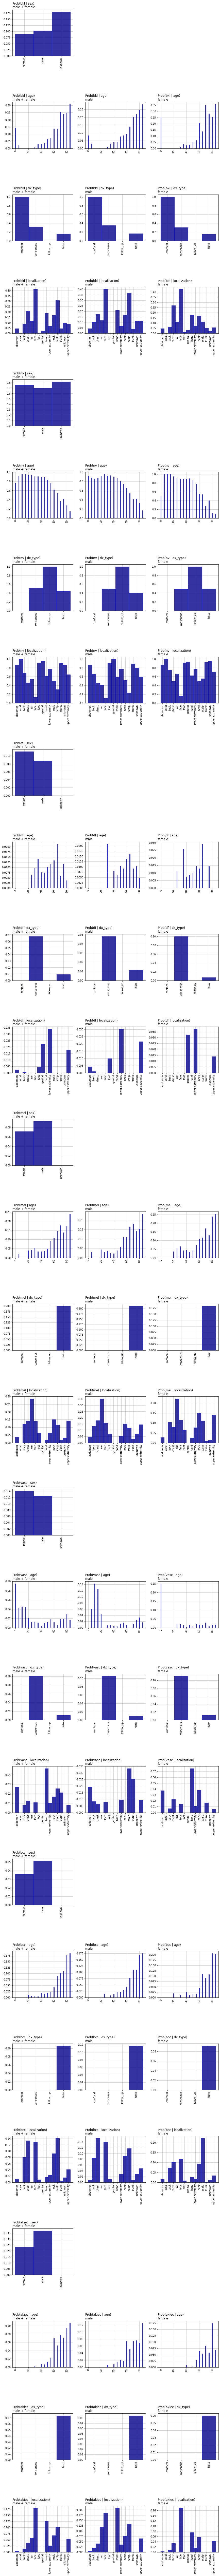

In [22]:
# We can visualize all of that as wel...

# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if not include_duplicates:
    df = HAM10000_metadata_unique
    print(f'CONSIDERING ALL {df.shape[0]} *DISTINCT* LESIONS...\n')
else:
    df = HAM10000_metadata
    print(f'CONSIDERING ALL {df.shape[0]} IMAGES (LESIONS COUNTED WITH MULTIPLICITY)...\n')

diagnoses = df['dx'].unique()
n = len(diagnoses)
sex = ['male + female', 'male', 'female']
m = len(sex)
features = ['sex', 'age', 'dx_type', 'localization']
k = len(features)

width = 12
height = 140
fig, _ = plt.subplots(figsize=(width, height))
plt.subplots_adjust(hspace=1)
fig.tight_layout()

for h in range(n):
    dx = diagnoses[h]
    for i in range(k):
        for j in range(m):
            feature, gender = features[i], sex[j] 
            if feature == 'sex' and (gender != 'male + female'):
                pass
            else:
                ax = plt.subplot(n*k, m, h*k*m + i*m + j + 1)
                plt.title(f'Prob({dx} | {feature}) \n{gender}', loc='left')
                

                ax.grid(True,zorder=0,alpha=0.7)

                if gender == 'male + female': # j == 2
                    data = df
                else:
                    data = df[df['sex'] == gender]
                A = 'dx'
                B = feature
                AgivenB = pd.crosstab(data[A], data[B], normalize='columns')
                ax.bar(AgivenB.loc[dx].keys(), AgivenB.loc[dx].values, 1, color='darkblue', edgecolor='blue', alpha = 0.8, zorder = 2)
                plt.xticks(rotation=90)

In [23]:
df = HAM10000_metadata_unique

A = 'no_of_images'
B = 'dx'
AgivenBabs = pd.crosstab(df[A], df[B])
AgivenB = pd.crosstab(df[A], df[B], normalize='columns').mul(100).round(2)
BgivenAabs = pd.crosstab(df[B], df[A])
BgivenA = pd.crosstab(df[B], df[A], normalize='columns').mul(100).round(2)

display(AgivenB)

dx            akiec    bcc    bkl     df    mel     nv   vasc
no_of_images                                                 
1             66.23  53.52  60.52  53.42  37.46  81.71  65.31
2             25.00  36.09  30.26  35.62  45.28  12.94  25.51
3              7.89  10.09   7.57  10.96  16.29   4.96   8.16
4              0.88   0.31   1.10   0.00   0.65   0.33   1.02
5              0.00   0.00   0.28   0.00   0.16   0.04   0.00
6              0.00   0.00   0.28   0.00   0.16   0.02   0.00

In [172]:
# We saw that around 75% of melanocytic nevi ('nv') were diagnosed
# via consensus  or follow-up,  and  only 25%  via histopathology.
# (See   Prob(dx_type  |  dx)    in   the  cell    for conditional
# probabilities.)  It may  be   instructive  to  break   this down
# further:  let's  look at the number of nevi that were  diagnosed
# by histopathology and imaged#  once,  twice, etc.,  and likewise
# for consensus and follow-up diagnosis types.

# We can  imagine a physician   inspecting a typical nevus, being
# confident in their diagnosis after just one image.  Indeed, all
# of the nevi diagnosed by follow-up were imaged just once (or at
# least,  we have just one  image  of them).  On  the other hand,
# inspecting  an  unusual-looking   nevus,   we can   imagine the
# physician  taking several  images,  and  then   conferring with
# colleagues or performing  a  biopsy. Indeed, around 40% of nevi
# diagnosed  via  consensus or  histopathology were imaged twice,
# with over 20% of the histopathology-diagnosed nevi imaged three
# or more times.

df = HAM10000_metadata_unique

ddf = df[df['dx'] == 'nv']
A = 'no_of_images'
B = 'dx_type'
AgivenBabs = pd.crosstab(ddf[A], ddf[B])
AgivenB = pd.crosstab(ddf[A], ddf[B], normalize='columns').mul(100).round(2)
BgivenAabs = pd.crosstab(ddf[B], ddf[A])
BgivenA = pd.crosstab(ddf[B], ddf[A], normalize='columns').mul(100).round(2)
a
display(BgivenA)

print('Melanocytic nevi.\n')
for dx_type in df[df['dx'] == 'nv']['dx_type'].unique():
    print(f'Method of diagnosis: {dx_type}')
    ddf = df[(df['dx'] == 'nv') & (df['dx_type'] == dx_type)]
    col = ddf['no_of_images']
    output = pd.concat([col.value_counts(dropna=False), col.value_counts(normalize=True,dropna=False).mul(100).round(2)],axis=1, keys=['freq', '%'])
    output.index.names = ['no_of_images']
    display(output.T)

no_of_images      1      2     3      4     5      6
dx_type                                             
consensus      4.14  19.17   4.1  11.11  50.0  100.0
follow_up     83.90   0.00   0.0   0.00   0.0    0.0
histo         11.96  80.83  95.9  88.89  50.0    0.0

Melanocytic nevi.

Method of diagnosis: consensus


no_of_images       1       2      3    4    5    6
freq          183.00  134.00  11.00  2.0  1.0  1.0
%              55.12   40.36   3.31  0.6  0.3  0.3

Method of diagnosis: follow_up


no_of_images       1
freq          3704.0
%              100.0

Method of diagnosis: histo


no_of_images       2       1      3      4     5
freq          565.00  528.00  257.0  16.00  1.00
%              41.33   38.62   18.8   1.17  0.07

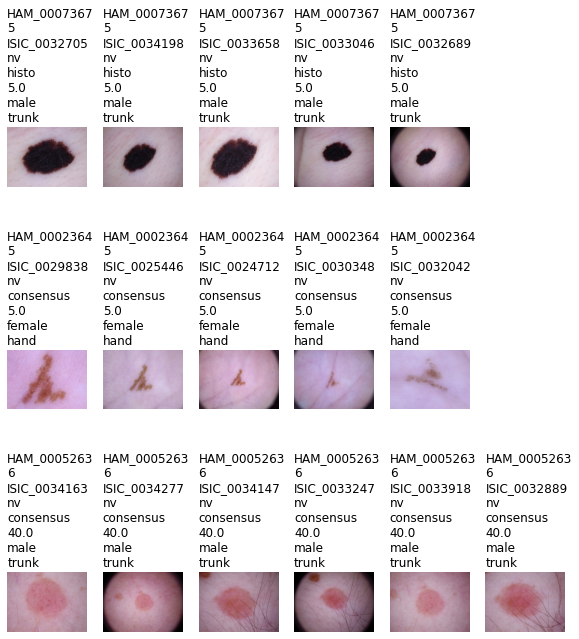

In [33]:
# Let's just  take a look at those nevi that were imaged five or
# six  times. To the untrained  eye,   these  do appear  to have
# slightly irregular borders, or perhaps have a diameter greater 
# than 6mm. It  will  be interesting to see what our models  say 
# about these lesions.

df = HAM10000_metadata[(HAM10000_metadata['dx'] == 'nv') & (HAM10000_metadata['no_of_images'] > 4)][['lesion_id', 'image_id', 'no_of_images']]
lesion_ids = df['lesion_id'].unique()
image_ids = {}

k = len(lesion_ids)
for i in range(k):
    image_ids[lesion_ids[i]] = df[df['lesion_id'] == lesion_ids[i]]['image_id'].values

max_imgs = max(len(image_ids[lesion]) for lesion in image_ids.keys())
img_count = 0
max_imgs
plt.figure(figsize=(10, 10))
for i in range(k):
    lesion = lesion_ids[i]
    m = len(image_ids[lesion])
    for j in range(m):
        img_id = image_ids[lesion][j]
        image = np.asarray(Image.open(path_to_images + img_id + img_ext))
        ax = plt.subplot(k,max_imgs, img_count + j + i + 1)
        plt.imshow(image)
        plt.subplots_adjust(top=1)
        [[lesion_id, no_of_images, image_id, dx, dx_type, age, sex, localization]] = HAM10000_metadata[HAM10000_metadata['image_id'] == img_id].values
        plt.title(lesion_id + '\n' + f'{no_of_images}' + '\n' + image_id + '\n' + dx + '\n' + dx_type + '\n' + f'{age}' + '\n' + sex + '\n' + localization, loc='left')
        plt.axis('off')
    img_count += m 


In [132]:
# Set include_duplicates  to True  to  count each distinct lesion
# with multiplicity equal to the number of images there are of it
# our dataset (i.e. count images rather than distinct lesions).
include_duplicates = False

if not include_duplicates:
    df = HAM10000_metadata_unique
    A = df['age'].isnull()
    B = df['sex'] == 'unknown'
    C = df['localization'] == 'unknown'
    print(f'Among the {df.shape[0]} distinct lesions in our dataset, the number for which values for...\n')
else:
    df = HAM10000_metadata
    A = df['age'].isnull()
    B = df['sex'] == 'unknown'
    C = df['localization'] == 'unknown'
    print(f'Among the {df.shape[0]} images in our dataset, the number for which values for...\n')
    
print(f'- at least one of age, sex, _or_ localization are missing is: {df[A | B | C].shape[0]} ({100*df[A | B | C].shape[0]/df.shape[0]:.2f}%);')
print(f'- all three of age, sex, _and_ localization are missing is: {df[A & B & C].shape[0]} ({100*df[A & B & C].shape[0]/df.shape[0]:.2f}%);')
print(f'- age is missing is: {df[A].shape[0]} ({100*df[A].shape[0]/df.shape[0]:.2f}%);')
print(f'- sex is missing is: {df[B].shape[0]} ({100*df[B].shape[0]/df.shape[0]:.2f}%);')
print(f'- localization is missing is: {df[C].shape[0]} ({100*df[C].shape[0]/df.shape[0]:.2f}%).')
# print(df[A].shape[0])
# print(df[B].shape[0])
# print(df[C].shape[0])
# print(df[A & B].shape[0])
# print(df[A & C].shape[0])
# print(df[B & C].shape[0])
# print(df[A & B & C].shape[0])
# print(df[A | B].shape[0])
# print(df[A | C].shape[0])
# print(df[A | B | C].shape[0])
# print(df[A & B & ~C].shape[0])
# ...

Among the 7470 distinct lesions in our dataset, the number for which values for...

- at least one of age, sex, _or_ localization are missing is: 213 (2.85%);
- all three of age, sex, _and_ localization are missing is: 46 (0.62%);
- age is missing is: 52 (0.70%);
- sex is missing is: 50 (0.67%);
- localization is missing is: 203 (2.72%).
